In [2]:
import numpy as np

# avoid for loops to get speed benefits of numpy

In [3]:
boid_count = 10

In [5]:
# Initialise birds in random positions
limits = np.array([2000, 2000])

In [7]:
limits[:, np.newaxis].shape

(2, 1)

In [11]:
limits.shape

(2,)

In [14]:
limits

array([2000, 2000])

In [15]:
limits[:, np.newaxis]

array([[2000],
       [2000]])

In [20]:
positions = np.random.rand(2, boid_count)

In [22]:
# First index selects x or y coord, second selects the bird
positions.shape

(2, 10)

In [23]:
# We want to scale the 10 random positions to be between 0 and 2000
positions = np.random.rand(2, boid_count) * limits[:, np.newaxis]

In [25]:
positions.shape

(2, 10)

In [26]:
positions

array([[ 456.49093004, 1224.10042098, 1356.01630238, 1182.28022657,
         122.32742352,  710.50367411,  346.47398842,  954.92760354,
        1578.42398463, 1048.37297541],
       [1269.06204242, 1323.46556619, 1667.35852703, 1365.61245001,
         991.99327624,   84.55015203, 1102.01148006, 1729.74738431,
         491.32765562, 1368.65862219]])

In [27]:
def new_flock(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits[:, np.newaxis] + np.random.rand(2, count) * width[:, np.newaxis])

In [28]:
positions = new_flock(10, np.array([100,900]), np.array([200,1100]))

# can also use this function to generate velocities of the birds, just change the limits
velocities = new_flock(10, np.array([0,-20]), np.array([10,20]))

In [29]:
# choosing timestep = 1 positions can be updated using
positions += velocities

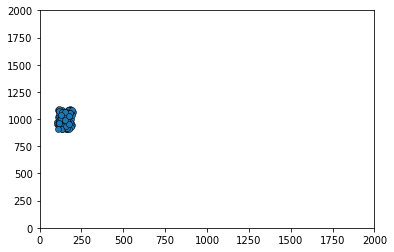

In [33]:
# Make an annimation
from matplotlib import animation
from matplotlib import pyplot as plt
%matplotlib inline

# Make a static plot showing the first frame
positions = new_flock(100, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(100, np.array([0, -20]), np.array([10, 20]))

figure = plt.figure()
axes = plt.axes(xlim = (0, limits[0]), ylim=(0,limits[1]))
scatter = axes.scatter(positions[0,:], positions[1, :], 
                      marker = 'o', edgecolor = 'k', lw = 0.5)
scatter

In [34]:
def update_boids(positions, velocities):
    positions += velocities

In [35]:
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

In [36]:
anim = animation.FuncAnimation(figure, animate, frames = 50, interval = 50)

In [37]:
positions = new_flock(100, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(100, np.array([0, -20]), np.array([10, 20]))

In [38]:
from IPython.display import HTML
HTML(anim.to_jshtml())

In [39]:
# Now want to get birds to fly towards middle but away from other birds

In [40]:
# Get the middle of the birds
middle = np.mean(positions, 0) #  this finds the average between x and y coord for each birds

In [43]:
middle = np.mean(positions, 1)

In [44]:
# Now subtract middle from each position to get direction to middle
direction_to_middle = positions - middle[:, np.newaxis]

In [45]:
# Get separations from each bird to every other bird

# This gets separation matrix for x coords
xpos = positions[0:]
xsep_matrix = xpos[:, np.newaxis] - xpos[np.newaxis, :]

In [47]:
# For both x and y separations to this same thing
separations = positions[:, np.newaxis, :] - positions[:, :, np.newaxis]

In [48]:
squared_displacements = separations * separations

In [49]:
square_distances = np.sum(squared_displacements, 0)

In [50]:
# Identify which birds are far away
alert_distance = 100
far_away = square_distances > alert_distance

# Set separation to 0 if they are close
separations_if_close = np.copy(separations)
separations_if_close[0, :,:][far_away] = 0
separations_if_close[1, :,:][far_away] = 0

In [51]:
far_away.shape

(100, 100)

In [52]:
# With separations and formation flying accounted for this is what we get
def update_boids(positions, velocities):
    move_to_middle_strength = 0.01
    middle = np.mean(positions, 1)
    direction_to_middle = positions - middle[:, np.newaxis]
    velocities -= direction_to_middle * move_to_middle_strength

    separations = positions[:, np.newaxis, :] - positions[:, :, np.newaxis]
    squared_displacements = separations * separations
    square_distances = np.sum(squared_displacements, 0)
    alert_distance = 100
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations)
    separations_if_close[0, :, :][far_away] = 0
    separations_if_close[1, :, :][far_away] = 0
    velocities += np.sum(separations_if_close, 1)

    velocity_differences = velocities[:, np.newaxis, :] - velocities[:, :, np.newaxis]
    formation_flying_distance = 10000
    formation_flying_strength = 0.125
    very_far = square_distances > formation_flying_distance
    velocity_differences_if_close = np.copy(velocity_differences)
    velocity_differences_if_close[0, :, :][very_far] = 0
    velocity_differences_if_close[1, :, :][very_far] = 0
    velocities -= np.mean(velocity_differences_if_close, 1) * formation_flying_strength

    positions += velocities

In [53]:
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

In [54]:
anim = animation.FuncAnimation(figure, animate,
                               frames=200, interval=50)


positions = new_flock(100, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(100, np.array([0, -20]), np.array([10, 20]))
HTML(anim.to_jshtml())